# Lazy Classification


# Import Libraries

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Read a DataFrame

In [243]:
data=pd.read_csv('Student.csv')

In [216]:
data.head()

,Maths,Physics,Chemistry,Result
0,17.0,27.0,22.0,0
1,72.0,82.0,77.0,1
2,97.0,18.0,13.0,0
3,8.0,42.0,37.0,0
4,32.0,25.0,20.0,0


In [215]:
#Show shape for dataframe
data.shape

(517, 4)

# summary of a DataFrame.

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Maths      513 non-null    float64
 1   Physics    510 non-null    float64
 2   Chemistry  510 non-null    float64
 3   Result     517 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 16.3 KB


# descriptive statistics.

In [218]:
data.describe()

,Maths,Physics,Chemistry,Result
count,513.000000,510.000000,510.000000,517.000000
mean,56.068226,55.670588,56.172549,0.473888
std,28.289471,24.185297,26.596557,0.499801
min,0.000000,10.000000,5.000000,0.000000
25%,34.000000,39.000000,36.000000,0.000000
50%,58.000000,57.500000,58.000000,0.000000
75%,80.000000,77.000000,78.750000,1.000000
max,100.000000,95.000000,99.000000,1.000000


#  Data PreProcessing

In [232]:
# Check null Values 
data.isnull().sum()

Maths        4
Physics      7
Chemistry    7
Result       0
dtype: int64

In [235]:
#Remove Null Values 
data.dropna(inplace=True)

In [236]:
#No Null Values
data.isnull().sum()

Maths        0
Physics      0
Chemistry    0
Result       0
dtype: int64

In [237]:
data.Result.value_counts()

0    265
1    234
Name: Result, dtype: int64

# Data Visualization

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Maths', ylabel='Density'>

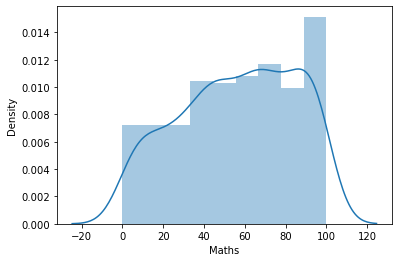

In [126]:
sns.distplot(data['Maths'])

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Physics', ylabel='Density'>

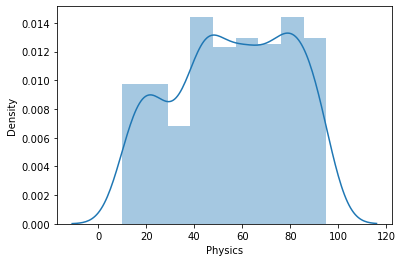

In [127]:
sns.distplot(data['Physics'])

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

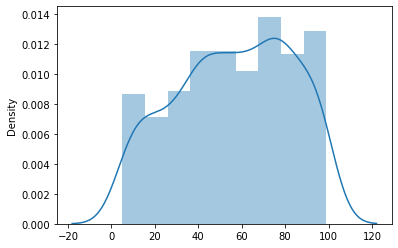

In [128]:

sns.distplot(data[['Chemistry']])

* My Dataset `Input is Data - Maths , Physics ,Chemistry` Follow by `Normal Distribution`


In [129]:
# Separate the input features and the target variable


# To check for outliers 

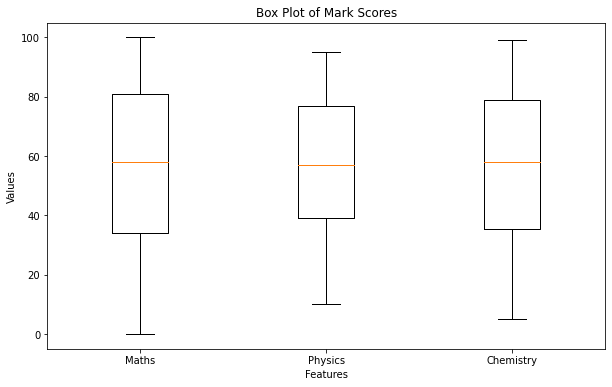

In [130]:
# how to identify outliers using the box plot visualization

# Separate the input features
X = data[['Maths', 'Physics', 'Chemistry']]

# Create box plots for each feature
plt.figure(figsize=(10, 6))
plt.boxplot(X.values, labels=X.columns)
plt.title('Box Plot of Mark Scores')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# Split data into training and testing sets

In [170]:
# Split data into training and testing sets
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


# Scaling numerical variables

In [172]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)

In [173]:
X_test = scaler.transform(X_test)

In [174]:
 y_train.value_counts(), y_test.value_counts()

(0    212
 1    187
 Name: Result, dtype: int64,
 0    53
 1    47
 Name: Result, dtype: int64)

# Model Training

## Logistic Regression

In [175]:
logres=LogisticRegression()
logres.fit(X_train,y_train)
ypre=logres.predict(X_test)

In [176]:

con_mat=confusion_matrix(y_test,ypre)
con_mat

array([[40, 13],
       [11, 36]], dtype=int64)

In [177]:
score=accuracy_score(y_test,ypre)
print('Logistic Regression Accuracy :',score)

Logistic Regression Accuracy : 0.76


# Naive Bayes

In [178]:
nb=GaussianNB().fit(X_train,y_train)
ypre=nb.predict(X_test)
score=accuracy_score(y_test,ypre)
print('Naive Bayes Accuracy :',score)


Naive Bayes Accuracy : 0.88


In [179]:
confusion_matrix(y_test,ypre)

array([[47,  6],
       [ 6, 41]], dtype=int64)

# Support Vector Machines (SVM)

In [180]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.96


# K – Nearest Neighbor (KNN)

In [181]:

knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2).fit(X_train,y_train)
ypre=knn.predict(X_test)
score=accuracy_score(y_test,ypre)
print('KNN Accuracy :',score)

KNN Accuracy : 0.96


In [182]:
confusion_matrix(y_test,ypre)

array([[49,  4],
       [ 0, 47]], dtype=int64)

# Decision Tree

In [183]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


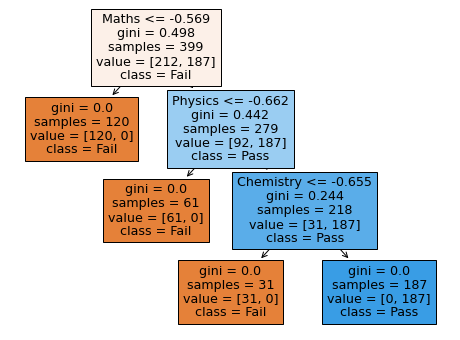

In [184]:
# Decision Tree visualization
plt.figure(figsize=(8, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True)
plt.show()


# Post pruning decision trees with cost complexity pruning


.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
:class:`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

See also `minimal_cost_complexity_pruning` for details on pruning.

In [185]:
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [186]:
ccp_alphas, impurities

(array([0.        , 0.13329195, 0.17579619, 0.18894894]),
 array([0.        , 0.13329195, 0.30908813, 0.49803707]))

In [187]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.18894894011377933


For the remainder of this example, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.


Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of :class:`DecisionTreeClassifier`, the tree overfits, leading to
a 91% training accuracy and 100% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.
In this example, setting ``ccp_alpha=0.188`` maximizes the testing accuracy.


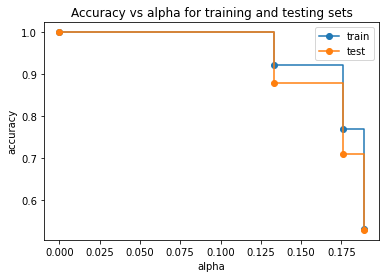

In [188]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [206]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=123,ccp_alpha=0.134)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.88


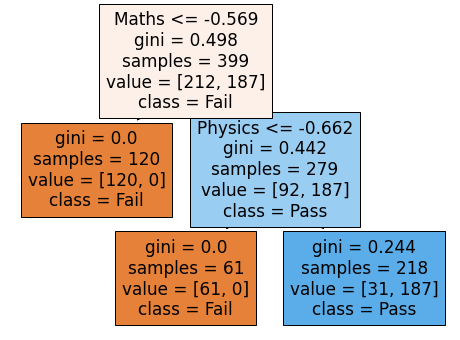

In [190]:
# Decision Tree visualization
plt.figure(figsize=(8, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True)
plt.show()

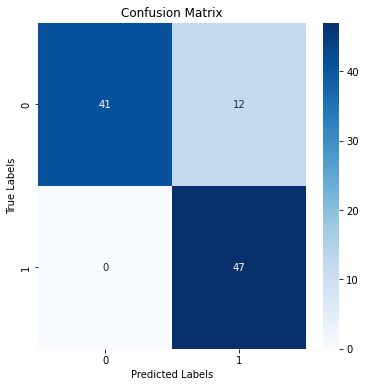

In [191]:


# Confusion Matrix visualization
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# model save

In [192]:
pickle.dump(dt_model,open('model.pkl','wb'))

In [193]:
model=pickle.load(open('model.pkl','rb'))

In [194]:
import numpy as np

In [195]:
m=np.array([10,77,66])

In [196]:
m=scaler.transform(m.reshape(1,-1))

D:\New folder\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [197]:
model.predict(m)

array([0], dtype=int64)

# Result is data a  Lazy is: 0 , No lazy is: 1